# Zugriff auf Bilddateien in der Nextcloud
In diesem Notebook werden wir zeigen, wie man Dateien von einem Nextcloud-Server herunterlädt, wie man sie lokal verarbeitet und die Ergebnisse wieder auf den Server hochlädt.

Wenn Sie an der Universität Leipzig arbeiten oder studieren, können Sie sich [hier](https://www.urz.uni-leipzig.de/unsere-services/servicedetail/service/eigener-cloud-speicher-speicherwolke) für ein Konto auf einem solchen Server anmelden.

In [1]:
from skimage.io import imread, imsave
from skimage.measure import label
import ipywidgets as widgets
import stackview

import nextcloud_client

## Anmeldung
Nach Ausführung der nächsten Zelle lokal werden Sie drei Eingabefelder sehen, in die Sie die Server-URL, den Benutzernamen und das Passwort eingeben können.

![](login.png)

In [2]:
server_widget = widgets.Text(value='https://speicherwolke.uni-leipzig.de', description='Server')
username_widget = widgets.Text(description='Username:')
password_widget = widgets.Password(description='Password')

widgets.VBox([server_widget, username_widget, password_widget])

**Drücken Sie NICHT Shift-Enter nach der Eingabe von Benutzername und Passwort**

In [3]:
if username_widget.value == '':
    raise RuntimeError('Enter username and password above')

In [4]:
ncc = nextcloud_client.Client(server_widget.value)
ncc.login(username_widget.value, password_widget.value)

In [5]:
# Passwort zurücksetzen
password_widget.value = ""

Eine typische Fehlermeldung ist 401: Zugriff verweigert. Überprüfen Sie Ihren Benutzernamen und Ihr Passwort.

## Durchsuchen des Remote-Servers
Um zu sehen, ob die Verbindung erfolgreich war, können wir einfach die Dateien in einem bestimmten Ordner auflisten.

In [7]:
# Geben Sie einen Ordner auf dem owncloud-Laufwerk ein, der existiert. '/' ist der Stammordner.
remote_folder = "/data/"

for f in ncc.list(remote_folder):
    print (f.path)

/data/blobs.tif


## Abrufen einer Datei
Wir können eine Datei in ein lokales Verzeichnis herunterladen.

In [8]:
# Geben Sie hier die Quelldatei ein
remote_source_file = '/data/blobs.tif'
# Geben Sie das Ziel ein
local_file = 'blobs.tif'

ncc.get_file(remote_path=remote_source_file, 
            local_file=local_file)

True

## Bildverarbeitung
Da wir die Datei heruntergeladen haben, funktioniert die Bildverarbeitung wie gewohnt.

StackViewNDArray([[ 40,  32,  24, ..., 216, 200, 200],
                  [ 56,  40,  24, ..., 232, 216, 216],
                  [ 64,  48,  24, ..., 240, 232, 232],
                  ...,
                  [ 72,  80,  80, ...,  48,  48,  48],
                  [ 80,  80,  80, ...,  48,  48,  48],
                  [ 96,  88,  80, ...,  48,  48,  48]], dtype=uint8)
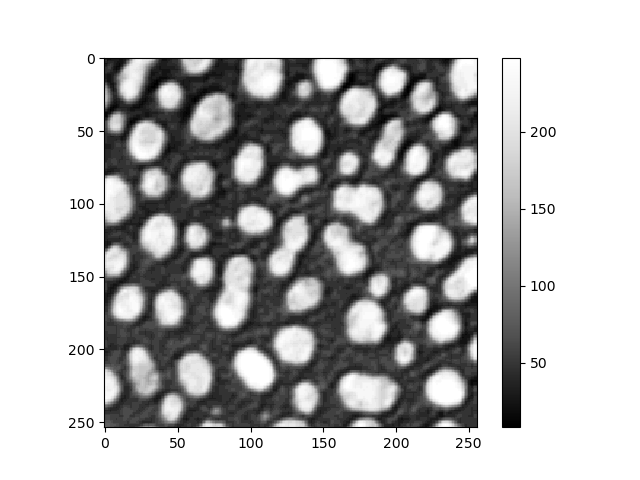
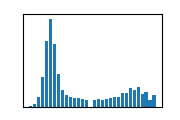

In [9]:
image = imread(local_file)
stackview.insight(image)

StackViewNDArray([[0, 0, 0, ..., 5, 5, 5],
                  [0, 0, 0, ..., 5, 5, 5],
                  [0, 0, 0, ..., 5, 5, 5],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]])
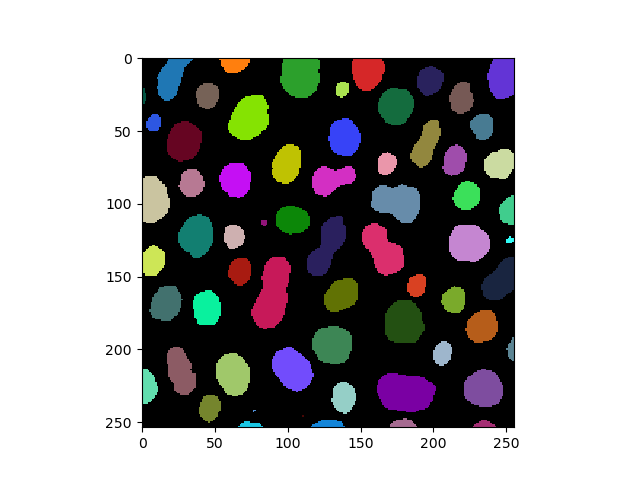

In [10]:
labels = label(image > image.max() / 2)
stackview.insight(labels)

## Ergebnisse hochladen
Bevor wir ein Bild in die Cloud hochladen, müssen wir es lokal speichern.

In [11]:
local_file_to_upload = "blobs_labels.tif"

imsave(local_file_to_upload, labels, check_contrast=False)

Wir werden die Datei in diesen Ordner hochladen:

In [12]:
remote_folder

'/data/'

In [13]:
ncc.put_file(remote_folder, local_file_to_upload)

True

Um sicherzugehen, überprüfen wir, ob die Datei angekommen ist, indem wir die Dateien im Ordner erneut ausgeben.

In [14]:
for f in ncc.list(remote_folder):
    print (f.path)

/data/blobs.tif
/data/blobs_labels.tif


## Abmelden
Wenn Sie fertig sind, melden Sie sich ab!

In [15]:
ncc.logout()

True